In [1]:
# Import the relevant dependencies for web scraping, Pandas, and Matplotlib.
%matplotlib inline
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
# Setup the executable path
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [3]:
# Visit the Mars Temperature Data website
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'
browser.visit(url)

In [4]:
# Setup the HTML parser
html = browser.html
temp_soup = soup(html, 'html.parser')

In [7]:
# Read the url and store into a pandas dataframe
temp_df = pd.read_html(url)[0]
temp_df.head(5)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


In [8]:
# Confirm the data types
temp_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [9]:
# Check to see if there are any null values 
temp_df.isnull().sum()

id                  0
terrestrial_date    0
sol                 0
ls                  0
month               0
min_temp            0
pressure            0
dtype: int64

In [10]:
# Convert the datatypes 
temp_df['id']=temp_df['id'].astype(int)
temp_df['terrestrial_date']=pd.to_datetime(temp_df['terrestrial_date'])
temp_df['sol']=temp_df['sol'].astype(int)
temp_df['ls']=temp_df['ls'].astype(int)
temp_df['month']=temp_df['month'].astype(int)
temp_df['min_temp']=temp_df['min_temp'].astype(float)
temp_df['pressure']=temp_df['pressure'].astype(float)

# Examine the datatypes to ensure the appropriate columns are assigned the right datatype
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


In [11]:
# How many months exist on Mars?
len(temp_df['month'].unique())

12

In [14]:
# How many Martian days worth of data exist in the scraped dataset?
len(temp_df['sol'].unique())

1867

In [15]:
# What are the coldest and the warmest months on Mars
monthly_temp_df = temp_df.groupby('month')['min_temp'].mean().sort_values()
monthly_temp_df

month
3    -83.307292
4    -82.747423
2    -79.932584
5    -79.308725
1    -77.160920
6    -75.299320
12   -74.451807
7    -72.281690
11   -71.985507
10   -71.982143
9    -69.171642
8    -68.382979
Name: min_temp, dtype: float64

In [16]:
# Which months have the lowest and the highest atmospheric pressure on Mars? 
monthly_temp_df=temp_df.groupby('month')
monthly_pressure=monthly_temp_df.mean().loc[:,['pressure']]
monthly_pressure

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


Text(0.5, 1.0, 'Average Atmosphere Pressure')

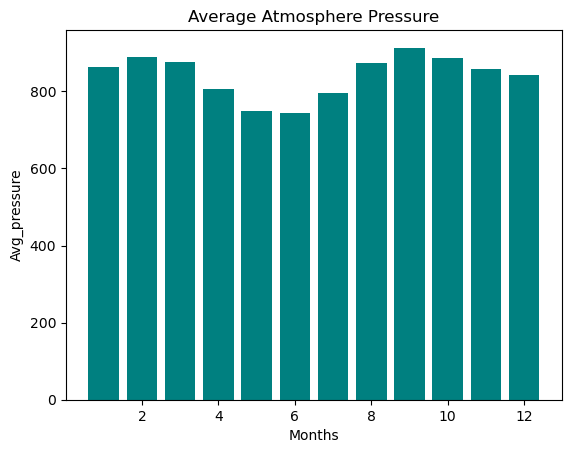

In [20]:
# Plot the results as a bar chart
i=range(1,13)
plt.bar(i, monthly_pressure['pressure'], color='teal')

# Create labels for the plot

plt.xlabel("Months")
plt.ylabel("Avg_pressure")

# Create title
plt.title('Average Atmosphere Pressure')

In [28]:
# How many days exist in a Martian year
longitude=temp_df['ls'].loc[0]
longitude

155

In [29]:
# Find the rows where the longitude value is equal to original longitude
first_longitude = temp_df.loc[temp_df['ls']==longitude]
first_longitude

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
598,621,2014-07-03,678,155,6,-77.0,739.0
599,624,2014-07-04,679,155,6,-77.0,738.0
1249,1274,2016-05-20,1346,155,6,-75.0,737.0
1250,1277,2016-05-21,1347,155,6,-75.0,736.0


In [30]:
# How many days elapse on earth
import datetime as dt
from datetime import datetime

y=first_longitude['terrestrial_date'].loc[0]
one_mars_year = first_longitude['terrestrial_date'].iloc[1]
one_mars_year= one_mars_year-y
one_mars_year

Timedelta('686 days 00:00:00')

Text(0.5, 1.0, 'Daily minimum temperature')

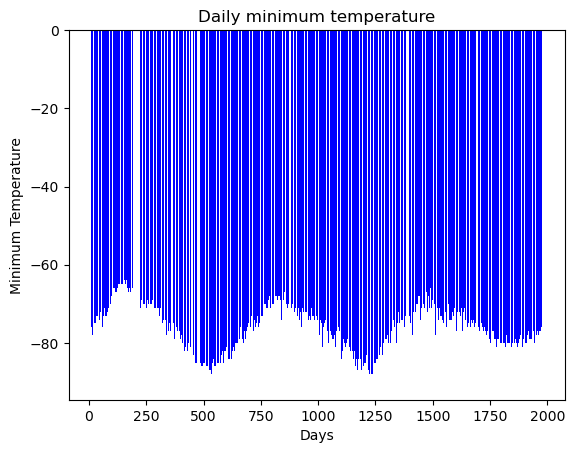

In [32]:
# Visually estimate the result by plotting the daily minimum temperature.
plt.bar(temp_df['sol'],temp_df['min_temp'], color = "blue")

# Create labels for the x and y axes.
plt.xlabel("Days")
plt.ylabel("Minimum Temperature")

# Create title 
plt.title('Daily minimum temperature')

In [34]:
#Export the DataFrame to a CSV file
temp_df.to_csv('mars_table.csv',index=False)